# Case - Weather Analysis

In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

* Lendo o arquivo em excel com pandas:

In [2]:
data = pd.read_excel('C:/git/Data-Science/data-src-py/weather_data.xls')
print(data.shape)
data.head()

(397, 7)


,weather_id,cidade,temperatura,previsao,sensacao,umidade,pressao
0,7,São Paulo - SP,26,Alguma nebulosidade,27,58,1015
1,8,São Paulo - SP,26,Alguma nebulosidade,27,58,1015
2,9,São Paulo - SP,26,Alguma nebulosidade,27,61,1014
3,22,São Paulo - SP,24,Alguma nebulosidade,24,74,1015
4,23,São Paulo - SP,24,Alguma nebulosidade,24,74,1015


* Plotando o gráfico:

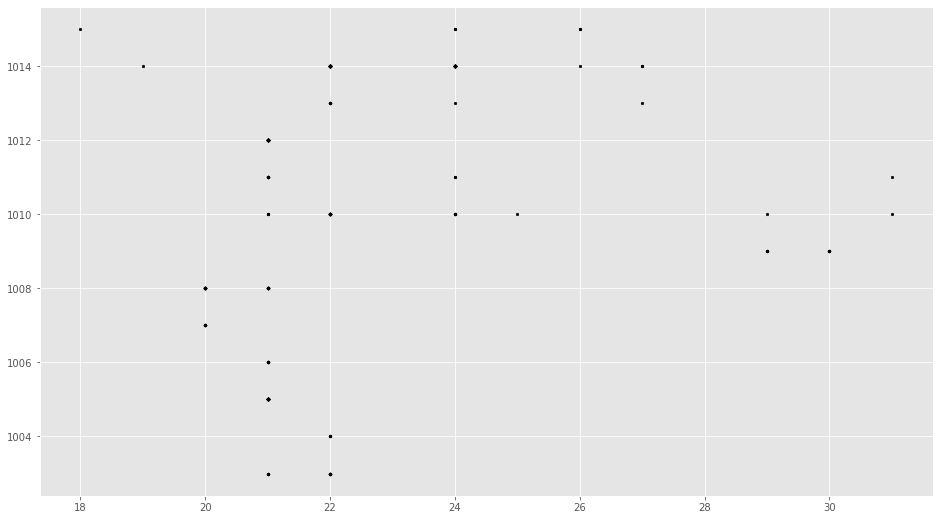

In [3]:
f1 = data['temperatura'].values
f2 = data['pressao'].values
X = np.array(list(zip(f1,f2)))
plt.scatter(f1, f2, c='black', s=7)

In [4]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis = ax)

In [5]:
k = 3
C_x = np.random.randint(0, np.max(X)-20, size=k)
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[529.   8.]
 [441. 829.]
 [222. 631.]]


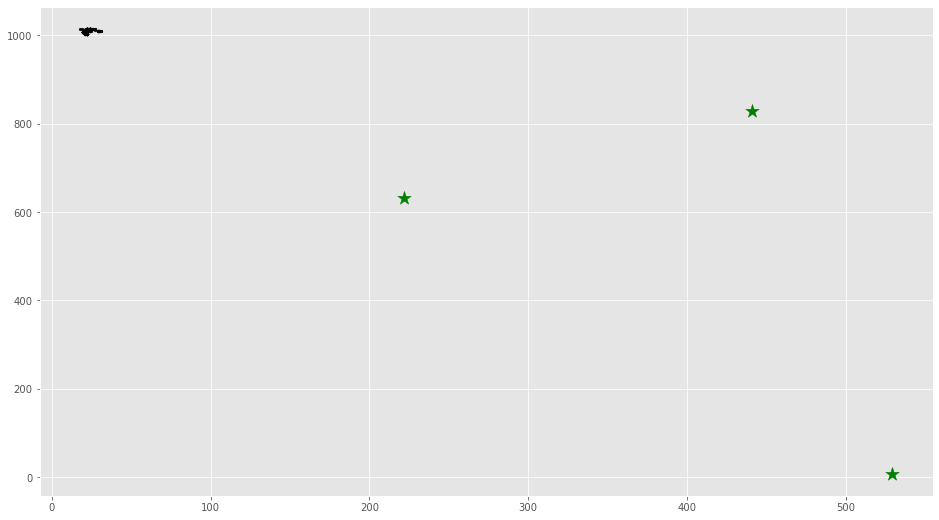

In [6]:
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [ ]:
C_old = np.zeros(C.shape)
clusters = np.zeros(len(X))
error = dist(C, C_old, None)
while error != 0:
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster

In [ ]:
C_old = deepcopy(C)


for i in range(k):
    points = [X[j] for j in range(len(X)) if clusters[j] == i]
    C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
              
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()

for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')   